In [ ]:
##### import library and data
import rfpimp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import scipy as sp
import scipy.stats as sps
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
df=pd.read_csv('casa007_assessment1_data.csv')

In [126]:
df

,local_authority_area,prevelance_2018,total budget per capita,clean_air,clean_env,health_train,school_aware,media_aware,sub_counselling
0,Barking and Dagenham,0.004197,0.764665,0.115525,0.121026,0.099021,0.225549,0.099021,0.104523
1,Barnet,0.002172,0.618056,0.140467,0.047759,0.064615,0.207891,0.084280,0.073043
2,Barnsley,0.002044,0.620436,0.158987,0.174498,0.019389,0.100821,0.112454,0.054288
3,Bath and North East Somerset,0.002609,0.850349,0.174295,0.221830,0.100352,0.264084,0.052817,0.036972
4,Bedford,0.002153,0.762629,0.217056,0.305052,0.099728,0.046931,0.017599,0.076263
...,...,...,...,...,...,...,...,...,...
145,Wirral,0.008729,0.610754,0.201636,0.137347,0.087668,0.119813,0.040912,0.023378
146,Wokingham,0.001014,0.653920,0.119985,0.245970,0.077990,0.113986,0.059993,0.035996
147,Wolverhampton,0.006545,0.761257,0.068172,0.102258,0.087109,0.208304,0.189367,0.106046
148,Worcestershire,0.005083,0.738028,0.200995,0.175871,0.089506,0.119341,0.105208,0.047108


y = -0.001 x + 0.004
Rsq =  0.008411571562635745
p-value =  0.2643246318179295


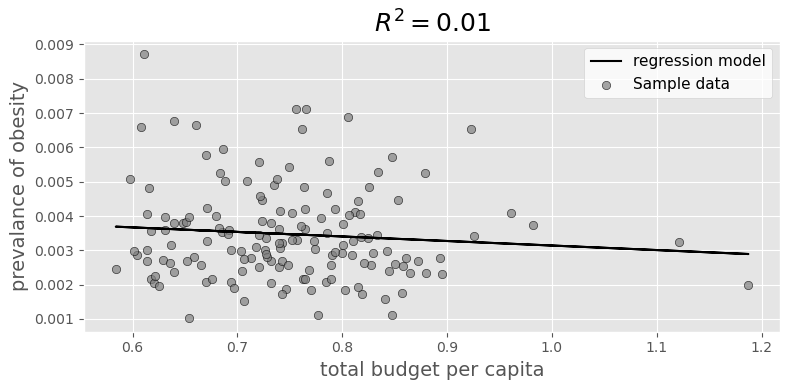

In [127]:
########draw regression model
X=df['total budget per capita'].values.reshape(-1,1)
y=df['prevelance_2018'].values

ols = linear_model.LinearRegression()
model = ols.fit(X, y)
response = model.predict(X)

############################################## Evaluate ############################################

r2 = model.score(X, y)

############################################## Plot ################################################

plt.style.use('default')
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize=(8, 4))

ax.plot(X, response, color='k', label='regression model')
ax.scatter(X, y, edgecolor='k', facecolor='grey', alpha=0.7, label='Sample data')
ax.set_ylabel('prevalance of obesity', fontsize=14)
ax.set_xlabel('total budget per capita', fontsize=14)
ax.text(0.8, 0.1,' ', fontsize=13, ha='center', va='center',
         transform=ax.transAxes, color='grey', alpha=0.5)
ax.legend(facecolor='white', fontsize=11)
ax.set_title('$R^2= %.2f$' % r2, fontsize=18)

fig.tight_layout()

print("y =", round(slope,3), "x +", round(intercept,3))
print("Rsq = ", r_value**2)
print("p-value = ", p_value)

In [128]:
features=['clean_air', 'clean_env', 'health_train', 'school_aware', 'media_aware', 'sub_counselling', 'prevelance_2018']
df_train, df_test = train_test_split(df, test_size=0.20)
df_train = df_train[features]
df_test = df_test[features]
X_train, y_train = df_train.drop('prevelance_2018',axis=1), df_train['prevelance_2018']
X_test, y_test = df_test.drop('prevelance_2018' , axis=1),df_test['prevelance_2018']

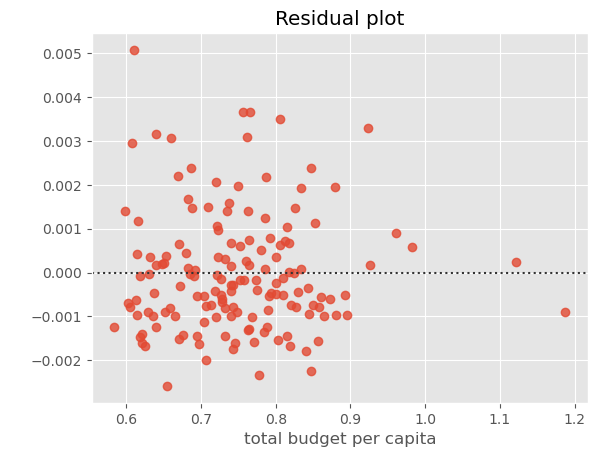

In [129]:
### draw residual plot
sns.residplot(x="total budget per capita", y="prevelance_2018", data=df)
plt.ylabel(' ')
plt.title('Residual plot')
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

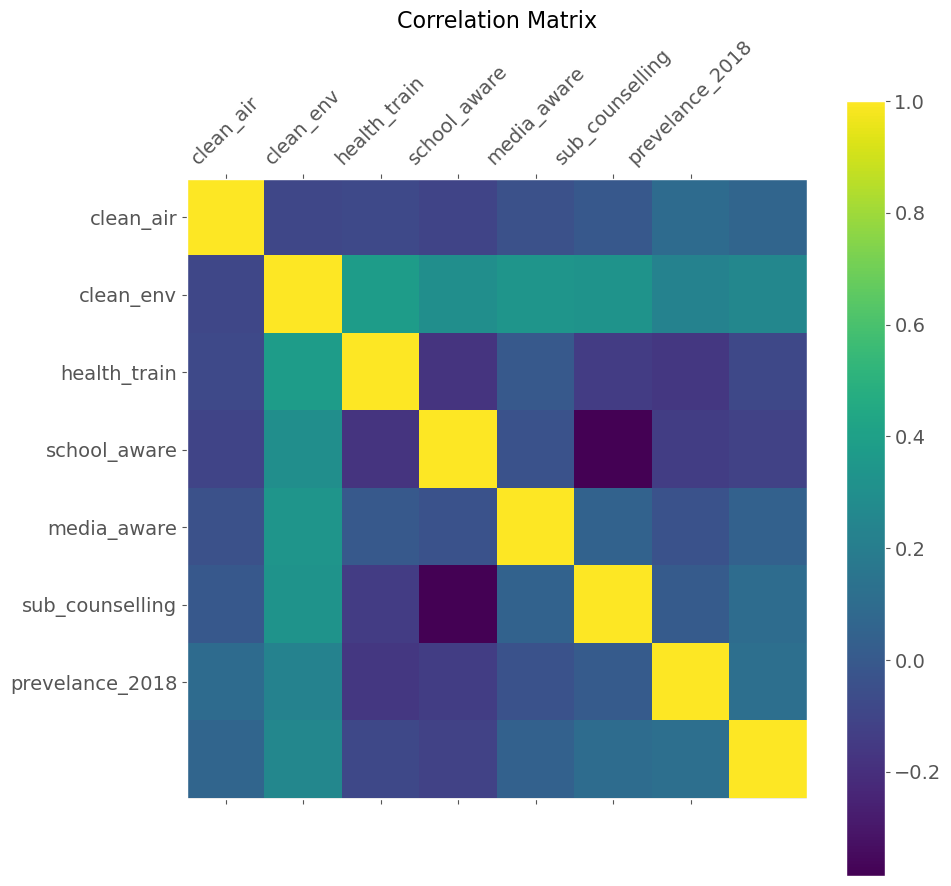

In [130]:
plt.rcParams["axes.grid"] = False
f = plt.figure(figsize=(10, 10))
plt.matshow(df.corr(), fignum=f.number)
plt.xticks(range(df[features].shape[1]), df[features].columns, fontsize=14, rotation=45)
plt.yticks(range(df[features].shape[1]), df[features].columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)

In [136]:
features=['clean_air', 'clean_env', 'health_train', 'school_aware', 'media_aware', 'sub_counselling', 'prevelance_2018']
dfmultiple=df[features]

In [140]:
from statsmodels.stats.outliers_influence import variance_inflation_factor 
from statsmodels.tools.tools import add_constant

def drop_column_using_vif_(df, thresh=5):
    '''
    Calculates VIF each feature in a pandas dataframe, and repeatedly drop the columns with the highest VIF
    A constant must be added to variance_inflation_factor or the results will be incorrect

    :param df: the pandas dataframe containing only the predictor features, not the response variable
    :param thresh: (default 5) the threshould VIF value. If the VIF of a variable is greater than thresh, it should be removed from the dataframe
    :return: dataframe with multicollinear features removed
    '''
    while True:
        # adding a constatnt item to the data. add_constant is a function from statsmodels (see the import above)
        df_with_const = add_constant(df)

        vif_df = pd.Series([variance_inflation_factor(df_with_const.values, i) 
               for i in range(df_with_const.shape[1])], name= "VIF",
              index=df_with_const.columns).to_frame()

        # drop the const
        vif_df = vif_df.drop('const')
        
        # if the largest VIF is above the thresh, remove a variable with the largest VIF
        # If there are multiple variabels with VIF>thresh, only one of them is removed. This is because we want to keep as many variables as possible
        if vif_df.VIF.max() > thresh:
            # If there are multiple variables with the maximum VIF, choose the first one
            index_to_drop = vif_df.index[vif_df.VIF == vif_df.VIF.max()].tolist()[0]
            print('Dropping: {}'.format(index_to_drop))
            df = df.drop(columns = index_to_drop)
        else:
            # No VIF is above threshold. Exit the loop
            break

    return df

In [ ]:
# using VIF on the df data
df_predictors_selected_VIF = drop_column_using_vif_(dfmultiple.drop('prevelance_2018', axis=1))
print("The columns remaining after VIF selection are:")
print(df_predictors_selected_VIF.columns)

df_final = sm.OLS(endog=dfmultiple['prevelance_2018'], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
df_final.summary()

In [144]:
model_bike_rental = sm.OLS(endog=dfmultiple[['prevelance_2018']], exog=sm.add_constant(df_predictors_selected_VIF)).fit()
model_bike_rental.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        prevelance_2018   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                 -0.013
Method:                 Least Squares   F-statistic:                    0.6180
Date:                Mon, 15 Nov 2021   Prob (F-statistic):              0.686
Time:                        16:41:45   Log-Likelihood:                 777.22
No. Observations:                 150   AIC:                            -1542.
Df Residuals:                     144   BIC:                            -1524.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0025      0.001      2.727      0.007       0.001       0.004
clean_air           0.0004      0.002      0.231      0.818      -0.003       0.004
health_train        0.0005      0.003      0.161      0.872      -0.005       0.006
school_aware        0.0008      0.002      0.521      0.603      -0.002       0.004
media_aware         0.0033      0.002      1.453      0.148      -0.001       0.008
sub_counselling     0.0029      0.004      0.825      0.411      -0.004       0.010
==============================================================================
Omnibus:                       29.046   Durbin-Watson:                   1.914
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               40.728
Skew:                           1.065   Prob(JB):                     1.43e-09
Kurtosis:                       4.408   Cond. No.                         33.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""